In [10]:
cusparse = []
gnna = []
accel = []

# filename='test_full_18graphs.txt'
# filename='test_full_7nm_tech.txt'
# filename='test_full_fpga.txt'
filename='result_full_booth.txt'
with open(filename, 'r') as f:
    for line in f:
        # split the line into words
        words = line.split()

        # ignore the line if it has less than two words (like the 'TIMING ...' line)
        if len(words) < 2:
            continue

        # convert the last word to float and append it to the appropriate list
        if words[-2] == 'cusparse':
            cusparse.append(float(words[-1]))
        elif words[-2] == 'gnna':
            gnna.append(float(words[-1]))
        elif words[-2] == 'accel':
            accel.append(float(words[-1]))

# print the lists to verify
print('cusparse:', cusparse)
print('gnna:', gnna)
print('accel:', accel)


cusparse: [1059.98, 1101.9, 1112.69, 1124.64, 1102.99, 1156.05, 1172.39, 1190.12, 1167.42, 1221.73, 1245.09, 1257.86, 1246.07, 1301.31, 1315.9, 1333.0, 1305.56, 1556.62, 1569.64, 1585.3, 1439.12, 1627.79, 1647.32, 1667.19, 1536.07, 1697.01, 1715.48, 1746.79, 1673.77, 1802.59, 1819.29, 1844.34, 1741.67, 1886.17, 1907.92, 1946.46, 1937.34, 2007.34, 2029.56, 2066.69, 2056.07, 2135.07, 2162.96, 2199.96, 2214.17, 2267.31, 2297.07, 2347.53, 2206.21, 2528.28, 2549.74, 2586.28, 2514.25, 2643.9, 2663.03, 2694.38, 2629.55, 2781.76, 2764.65, 2802.57, 2803.37, 2861.19, 2889.49, 2929.39, 2850.74, 3001.1, 3026.69, 3068.01, 3088.0, 3155.36, 3182.8, 3228.27, 3214.93, 3302.29, 3334.97, 3376.21, 3393.15, 3455.19, 3512.48, 3523.14, 3445.34, 3609.97, 3628.18, 3662.73, 3713.85, 3736.48, 3767.57, 3810.28, 3796.72, 3888.85, 3923.27, 3971.33, 3989.8, 4049.9, 4072.95, 4120.48, 4037.41, 4224.84, 4218.16, 4267.42, 4288.11, 4337.7, 4367.24, 4407.92, 4389.12, 4475.35, 4504.33, 4553.14, 4591.48, 4624.66, 4649.98, 4

In [11]:
from collections import defaultdict

# Create a nested dictionary using defaultdict
data = defaultdict(lambda: defaultdict(list))

with open(filename, 'r') as f:
    for line in f:
        words = line.split()
        if len(words) < 4:
            continue
            
        # Graph name is the second word from the end in each line           
        graph_name = words[-4]

        # Kernel name and time are the second last and last words
        kernel_name = words[-2]
        time = float(words[-1])

        # Populate the data dictionary
        data[graph_name][kernel_name].append(time)

# Print the dictionary to verify
for graph_name, graph_dict in data.items():
    print(f"{graph_name}:")
    for kernel_name, kernel_times in graph_dict.items():
        print(f"\t{kernel_name}: {kernel_times}")


booth_mult448_shared:
	cusparse: [1059.98, 1101.9, 1112.69, 1124.64, 1102.99, 1156.05, 1172.39, 1190.12, 1167.42, 1221.73, 1245.09, 1257.86, 1246.07, 1301.31, 1315.9, 1333.0, 1305.56, 1556.62, 1569.64, 1585.3, 1439.12, 1627.79, 1647.32, 1667.19, 1536.07, 1697.01, 1715.48, 1746.79, 1673.77, 1802.59, 1819.29, 1844.34, 1741.67, 1886.17, 1907.92, 1946.46, 1937.34, 2007.34, 2029.56, 2066.69, 2056.07, 2135.07, 2162.96, 2199.96, 2214.17, 2267.31, 2297.07, 2347.53, 2206.21, 2528.28, 2549.74, 2586.28, 2514.25, 2643.9, 2663.03, 2694.38, 2629.55, 2781.76, 2764.65, 2802.57, 2803.37, 2861.19, 2889.49, 2929.39, 2850.74, 3001.1, 3026.69, 3068.01, 3088.0, 3155.36, 3182.8, 3228.27, 3214.93, 3302.29, 3334.97, 3376.21, 3393.15, 3455.19, 3512.48, 3523.14, 3445.34, 3609.97, 3628.18, 3662.73, 3713.85, 3736.48, 3767.57, 3810.28, 3796.72, 3888.85, 3923.27, 3971.33, 3989.8, 4049.9, 4072.95, 4120.48, 4037.41, 4224.84, 4218.16, 4267.42, 4288.11, 4337.7, 4367.24, 4407.92, 4389.12, 4475.35, 4504.33, 4553.14, 4591.

len(graph_dict[cusparse]):
 113
average speed-up ratio for accel:6.836487590414085, and maximum speed-up:10.35452675603174, in dim: 17

average speed-up ratio for cusparse:6.253293146505555 , and maximum speed-up:7.882284376052656, in dim: 36

maximum spd-up ratio of accel against cusparse: 1.3966101558068795, at: 17



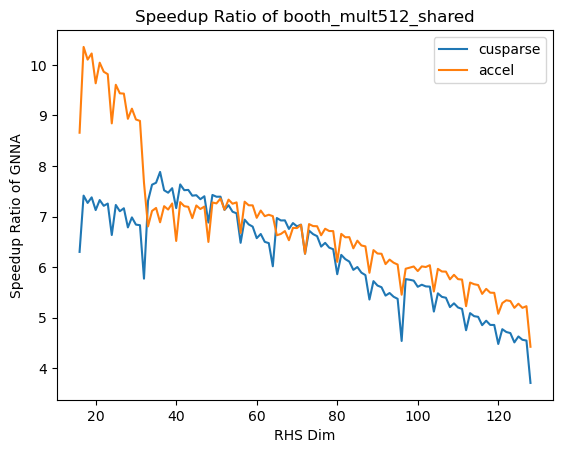

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assume that graph_name is the graph you're interested in.
# graph_name = 'mult512_fpga_4lut_shared'
graph_name ='booth_mult512_shared'
# graph_name = 'citation'
# graph_name = 'arxiv'
# graph_name ='mult512_7nm_mapped_shared'
# Get the runtimes for the specific graph
graph_dict = data[graph_name]

# Ensure 'cusparse' (as the baseline) and other kernel runtimes exist, and the runtime numbers are equal for fair comparison
if 'cusparse' in graph_dict and 'gnna' in graph_dict and 'accel' in graph_dict:
    if len(graph_dict['cusparse']) == len(graph_dict['gnna']) == len(graph_dict['accel']):
        print('len(graph_dict[cusparse]):\n',len(graph_dict['cusparse']))
        # cusparse = np.array(graph_dict['cusparse'])
        gnna = np.array(graph_dict['gnna'])

        # Calculate speedup ratio
        cusparse_ratio = gnna / np.array(graph_dict['cusparse'])
        accel_ratio = gnna / np.array(graph_dict['accel'])
        
        dim = np.arange(16, 129,1)
        accel_max=dim[np.argmax(accel_ratio)]
        
        print(f"average speed-up ratio for accel:{np.average(accel_ratio)}, and maximum speed-up:{np.max(accel_ratio)}, in dim: {accel_max}\n")
        print(f"average speed-up ratio for cusparse:{np.average(cusparse_ratio)} , and maximum speed-up:{np.max(cusparse_ratio)}, in dim: {dim[np.argmax(cusparse_ratio)]}\n")
        print(f"maximum spd-up ratio of accel against cusparse: {np.max(accel_ratio/cusparse_ratio)}, at: {dim[np.argmax(accel_ratio/cusparse_ratio)]}\n")
        # Create an x-axis for the plot, considering the number of data points
        # x = np.array(range(1, len(cusparse) + 1))
        x = list(range(16, 129))  # end value in range is exclusive, hence 129 instead of 128
        # Draw the speed-up ratio curves    
        plt.plot(x, cusparse_ratio, label='cusparse')
        plt.plot(x, accel_ratio, label='accel')

        # Add labels and title
        plt.xlabel('RHS Dim')
        plt.ylabel('Speedup Ratio of GNNA')
        plt.title(f'Speedup Ratio of {graph_name}')
        plt.legend()

        # Display the plot
        plt.show()
    else:
        print("Mismatch in data sizes")
else:
    print(f"'cusparse', 'gnna', or 'accel' data doesn't exist for '{graph_name}'")
